

 -------------------- 


PART 1: Initial Data Analysis 



 -------------------- 


2. Head of the DataFrame: 

                                                                                  0  \
N                                                                                 1   
Посада                                                           Junior QA engineer   
Мова програмування                                                              NaN   
Спеціалізація                                                             Manual QA   
Загальний досвід роботи                                                         0.5   
Досвід роботи на поточному місці                                                0.5   
Зарплата на місяць                                                              400   
Зміна зарплати за 12 місяців                                                      0   
Місто                                                                        Харків   
Розмір компанії 

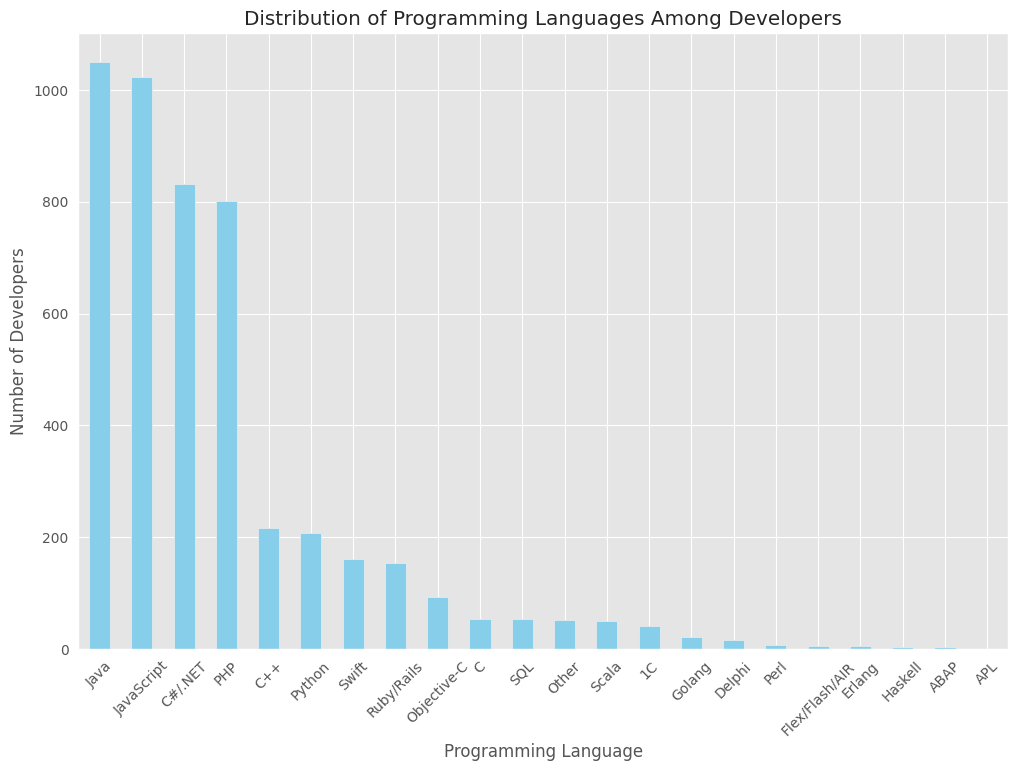


2. Distribution of Spesializations Among QA (Pie Plot)



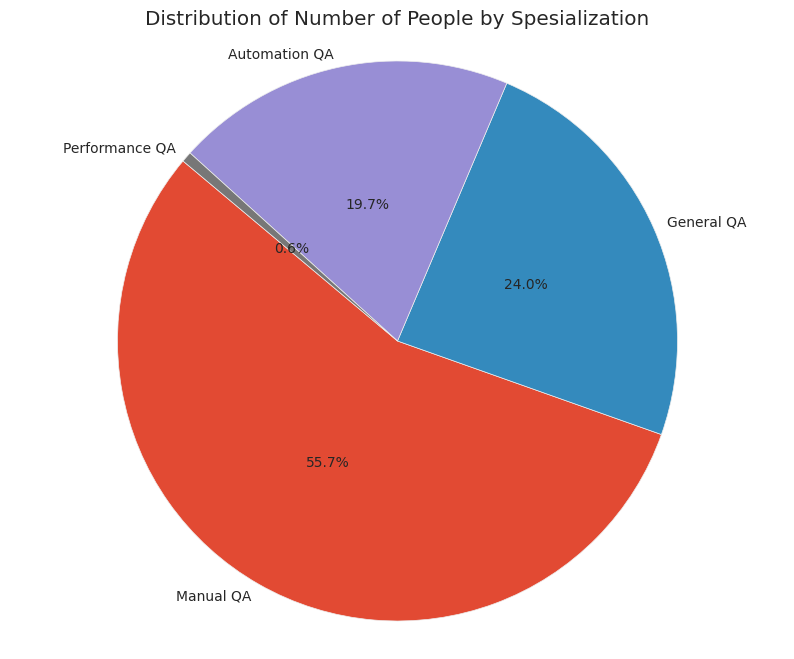


3. Aggregated Data for Minimum and Maximum Monthly Salary by Position (Bar Plot)



<Figure size 3000x2200 with 0 Axes>

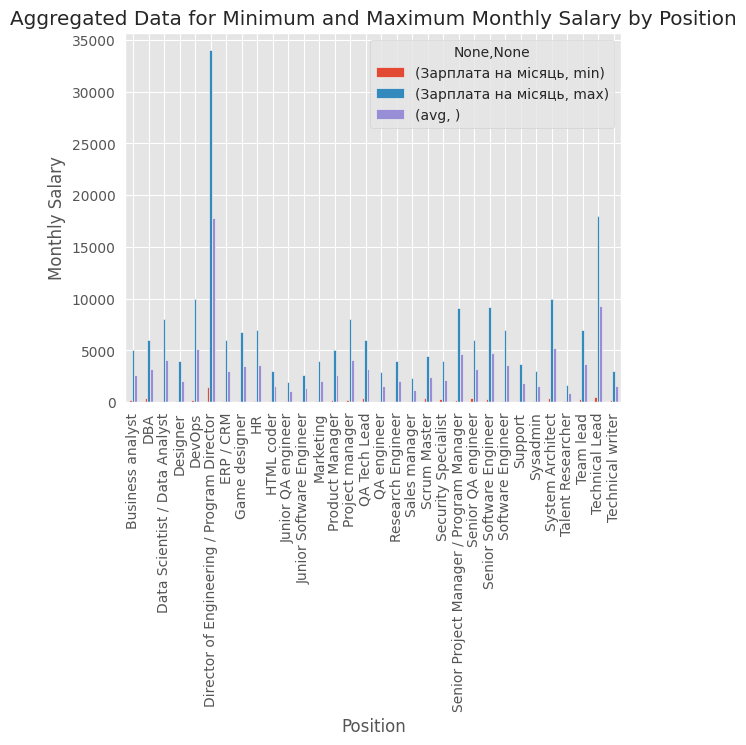

In [30]:
from io import StringIO

import pandas as pd
import requests

# Set display options
pd.set_option(
    "display.float_format", lambda x: "%.1f" % x
)  # Sets precision to 1 decimal places


# PART 1: Initial Data Analysis
print("\n\n", "-" * 20, "\n\n")
print("PART 1: Initial Data Analysis \n")
# URL of the CSV file
url = "https://raw.githubusercontent.com/Anastasia-front/data-science/main/csv/2017_jun_final.csv"

# Read the CSV file content from the URL
response = requests.get(url)
content = response.content.decode("utf-8")

# 1. Read the file `2017_jun_final.csv` using the `read_csv` method.
data = pd.read_csv(StringIO(content))

# 2. Read the obtained table using the `head` method.
print("\n\n", "-" * 20, "\n\n")
print("2. Head of the DataFrame: \n")
# Transpose the DataFrame to display it in one row
first_5_transposed = data.iloc[:5].T
print(first_5_transposed)

# 3. Determine the size of the table using the `shape` method.
print("\n\n", "-" * 20, "\n\n")
print("3. Size of the DataFrame:", data.shape)

# 4. Determine the data types of all columns using the `dtypes` attribute.
print("\n\n", "-" * 20, "\n\n")
print("4. Data types of all columns: \n")
print(data.dtypes)

# 5. Calculate the proportion of missing values in each column
missing_values_proportion = data.isnull().sum() / len(data)
print("\n\n", "-" * 20, "\n\n")
print("5. Proportion of missing values in each column: \n")
print(missing_values_proportion)

# PART 2: Data Cleaning
print("\n\n", "-" * 20, "\n\n")
print("\nPART 2: Data Cleaning \n")

# 6. Calculate the proportion of missing values after removing columns with missing values except the "Programming Language" column.
print("\n\n", "-" * 20, "\n\n")
# 6.1. Removing columns with missing values except the 'Programming Language' column
print(
    "6.1. Removing columns with missing values except the 'Programming Language' column: \n"
)
columns_to_keep = ["Мова програмування"]
data_cleaned = data.dropna(subset=columns_to_keep, how="any")
print(data_cleaned.head())
print("\n", "~" * 20, "\n")
# 6.2. Proportion of missing values after cleaning
print("\n6.2. Proportion of missing values after cleaning: \n")
missing_values_proportion_cleaned = data_cleaned.isnull().sum() / len(data_cleaned)
print(missing_values_proportion_cleaned)

# 7. Delete all rows with missing values in the original table
print("\n\n", "-" * 20, "\n\n")
print("7.Delete all rows with missing values in the original table: \n")
data_cleaned = data.dropna()
print(data_cleaned.head())

# 8. Determine the new size of the table
print("\n\n", "-" * 20, "\n\n")
print(
    "8. New size of the DataFrame after dropping rows with missing values:",
    data_cleaned.shape,
)


# PART 3: Creating Subset and Aggregation
print("\n\n", "-" * 20, "\n\n")
print("\nPART 3: Creating Subset and Aggregating Data \n")

# 9. Create a new table `python_data` containing only rows where developers indicated the Python programming language.
python_data = data[data["Мова програмування"] == "Python"]
print("\n\n", "-" * 20, "\n\n")
print("9. Size of python_data:", python_data.shape)

# 10. Perform grouping by the "Position" column
print("\n\n", "-" * 20, "\n\n")
print("10. Perform grouping by the 'Position' column: \n")
grouped_data = data.groupby("Посада")
print(grouped_data.head())

# 11. Create a new DataFrame with aggregated data for the "Position" column
aggregated_data = grouped_data.agg({"Зарплата на місяць": ["min", "max"]})
print("\n\n", "-" * 20, "\n\n")
print("11. Aggregated data for the 'Position' column: \n")
print(aggregated_data)

# PART 4: Data Transformation and Analysis
print("\n\n", "-" * 20, "\n\n")
print("\nPART 4: Data Transformation and Analysis \n")


# 12. Create a function `fill_avg_salary` that returns the average monthly salary
def fill_avg_salary(row):
    return row["Зарплата на місяць"].mean()


# def fill_avg_salary(group):
#     return group.mean()
print("\n\n", "-" * 20, "\n\n")
print(
    "12. Create a function `fill_avg_salary` that returns the average monthly salary: \n"
)
print(
    """def fill_avg_salary(row):
    return row['Зарплата на місяць'].mean()"""
)

# 13. Apply the function to create a new column named "avg"
aggregated_data["avg"] = aggregated_data.apply(fill_avg_salary, axis=1)
# aggregated_data["avg"] = aggregated_data.groupby("Посада")["Зарплата на місяць"].transform(fill_avg_salary)
print("\n\n", "-" * 20, "\n\n")
print("13. Apply the function to create a new column named 'avg': \n")
print(aggregated_data.head())


# 14. Generate descriptive statistics for the new column
print("\n\n", "-" * 20, "\n\n")
print("14. Descriptive statistics for the 'avg' column: \n")
print(aggregated_data["avg"].describe())


# 15. Save the resulting table to a CSV file
aggregated_data.to_csv("cleaned_data.csv", index=False)
print("\n\n", "-" * 20, "\n\n")
print("15. Save the resulting table to a CSV file: \n")
print(
    "Data analysis and cleaning completed successfully and saved the resulting table to a CSV file called cleaned_data. \n"
)


import matplotlib.pyplot as plt

print("VIZUALIZATION")


# Plot 1: Distribution of Programming Languages Among Developers (Bar Plot)
print("\n1. Distribution of Programming Languages Among Developers (Bar Plot)\n")
plt.figure(figsize=(12, 8))
language_distribution = data["Мова програмування"].value_counts()
language_distribution.plot(kind="bar", color="skyblue")
plt.title("Distribution of Programming Languages Among Developers")
plt.xlabel("Programming Language")
plt.ylabel("Number of Developers")
plt.xticks(rotation=45)
plt.show()


# Plot 2: Distribution of Spesializations Among QA (Pie Plot)
print("\n2. Distribution of Spesializations Among QA (Pie Plot)\n")
plt.figure(figsize=(10, 8))
distribution = data["Спеціалізація"].value_counts()
labels = distribution.index
data = distribution.values
plt.pie(
    data,
    labels=labels,
    autopct="%.1f%%",
    pctdistance=0.5,
    labeldistance=1.05,
    startangle=140,
)
plt.title("Distribution of Number of People by Spesialization")
plt.axis("equal")
plt.show()


# Plot 3: Aggregated Data for Minimum and Maximum Monthly Salary by Position (Bar Plot)
print(
    "\n3. Aggregated Data for Minimum and Maximum Monthly Salary by Position (Bar Plot)\n"
)
plt.figure(figsize=(30, 22))  # Increased size
aggregated_data.plot(kind="bar", stacked=False)
plt.title("Aggregated Data for Minimum and Maximum Monthly Salary by Position")
plt.xlabel("Position")
plt.ylabel("Monthly Salary")
plt.xticks(rotation=90)  # Rotated labels for better readability
plt.show()
